> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [3]:
# 🔧 Add code here

In [4]:
# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

#change the test size to .2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556


In [5]:
# Remove 'celebrity' and 'funny' features
X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]
y = youtube['high_engagement']

# keep the .3 test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[24 14]
 [20 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68

Accuracy: 0.5


### ✍️ Your Response: 🔧
1. The model that preformed best was when I changed the test size to 0.2. This is probably because the model has more data (80%) to train on, which in turn allows it to be more accurate and reduces bias. Additionally, the confusion matrix is the most accurate (TP & TN) with the test size being .2.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [6]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [7]:
# 🔧 Add code here:

In [8]:
# Changing kernel to poly

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='poly', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Confusion Matrix:
 [[24 14]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.63      0.62        38
           1       0.50      0.47      0.48        30

    accuracy                           0.56        68
   macro avg       0.55      0.55      0.55        68
weighted avg       0.56      0.56      0.56        68

Accuracy: 0.5588235294117647


In [9]:
# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=.1, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Confusion Matrix:
 [[ 0 38]
 [ 0 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.44      1.00      0.61        30

    accuracy                           0.44        68
   macro avg       0.22      0.50      0.31        68
weighted avg       0.19      0.44      0.27        68

Accuracy: 0.4411764705882353


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
#change C to 10

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)
# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C= 10, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Confusion Matrix:
 [[18 20]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.47      0.51        38
           1       0.44      0.53      0.48        30

    accuracy                           0.50        68
   macro avg       0.50      0.50      0.50        68
weighted avg       0.51      0.50      0.50        68

Accuracy: 0.5


In [11]:
# Add c = 100 and a 'linear' kernel
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='linear', C=100, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))

Confusion Matrix:
 [[27 11]
 [10 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        38
           1       0.65      0.67      0.66        30

    accuracy                           0.69        68
   macro avg       0.69      0.69      0.69        68
weighted avg       0.69      0.69      0.69        68

Accuracy: 0.6911764705882353


### ✍️ Your Response: 🔧
1. I chose the C values of .1 and 10, and then I did 100 at a linear kernel. The .1 value, had a pretty inaccurate result.A higher C means that the model is better trained to be accurate but it might overfit the data. A lower C value will create a simpler descision boundary but missclassify data more. It also depends on the kernel type too.
2. The original value of C (100) at a linear kernel gave me the most accurate number.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5624 - loss: 0.7002 - val_accuracy: 0.5294 - val_loss: 0.6891
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6270 - loss: 0.6792 - val_accuracy: 0.5441 - val_loss: 0.6901
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6063 - loss: 0.6878 - val_accuracy: 0.5441 - val_loss: 0.6915
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6057 - loss: 0.6784 - val_accuracy: 0.5441 - val_loss: 0.6928
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5450 - loss: 0.6836 - val_accuracy: 0.5441 - val_loss: 0.6936
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5487 - loss: 0.6800 - val_accuracy: 0.5441 - val_loss: 0.6950
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6063 - loss: 0.6726 - val_accuracy: 0.5441 - val_loss: 0.6967
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6620 - loss: 0.6570 - val_accuracy: 0.5441 - val_los

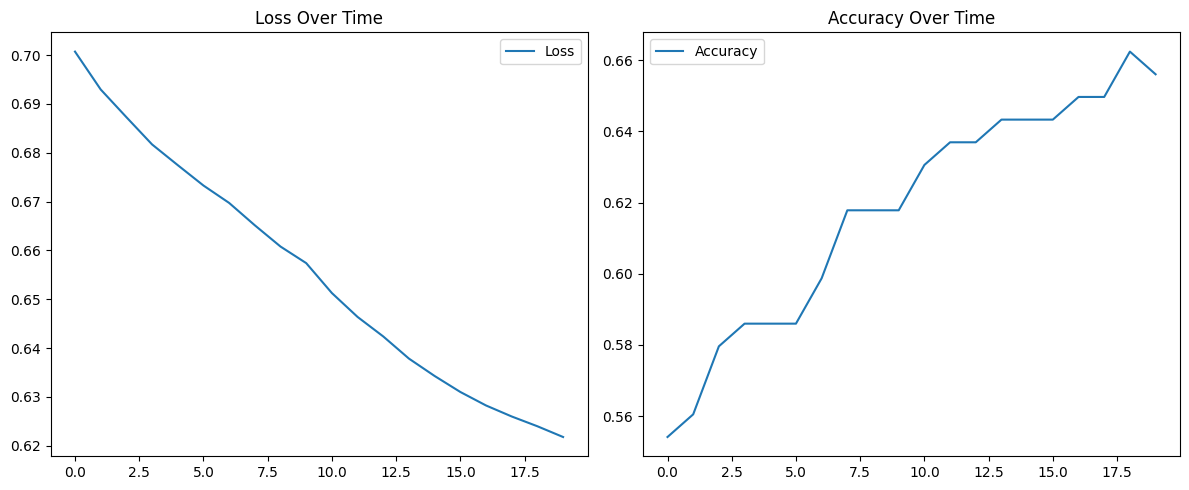

In [13]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.


In [14]:
# 🔧 Add code here

In [15]:
# Best accuracy was 1 new layer
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_16 = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.4893 - loss: 0.7002 - val_accuracy: 0.5735 - val_loss: 0.6895
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4175 - loss: 0.7001 - val_accuracy: 0.4853 - val_loss: 0.6908
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4274 - loss: 0.6993 - val_accuracy: 0.5147 - val_loss: 0.6920
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4961 - loss: 0.6937 - val_accuracy: 0.4853 - val_loss: 0.6928
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4563 - loss: 0.6938 - val_accuracy: 0.4559 - val_loss: 0.6937
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5230 - loss: 0.6914 - val_accuracy: 0.4559 - val_loss: 0.6947
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5683 - loss: 0.6903 - val_accuracy: 0.4559 - val_loss: 0.6957
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5445 - loss: 0.6894 - val_accuracy: 0.4559 - val_loss: 0.

In [16]:
# Model with 32 batches and Dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dropout(0.2), # Added Dropout
    Dense(8, activation='relu'),  #Layer 2
    Dropout(0.2), # Added Dropout
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_batch32_dropout = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5194 - loss: 0.6962 - val_accuracy: 0.5735 - val_loss: 0.6740
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.4292 - loss: 0.7260 - val_accuracy: 0.5735 - val_loss: 0.6769
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4438 - loss: 0.7090 - val_accuracy: 0.5882 - val_loss: 0.6797
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5443 - loss: 0.6901 - val_accuracy: 0.5588 - val_loss: 0.6823
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5131 - loss: 0.7001 - val_accuracy: 0.5294 - val_loss: 0.6839
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5179 - loss: 0.7124 - val_accuracy: 0.5294 - val_loss: 0.6847
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5261 - loss: 0.6895 - val_accuracy: 0.5147 - val_loss: 0.6854
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4719 - loss: 0.7055 - val_accuracy: 0.5147 - val_loss: 0.6862
Epoch 9/20

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
 [[ 8 30]
 [ 1 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.21      0.34        38
           1       0.49      0.97      0.65        30

    accuracy                           0.54        68
   macro avg       0.69      0.59      0.50        68
weighted avg       0.71      0.54      0.48        68

Accuracy: 0.5441176470588235


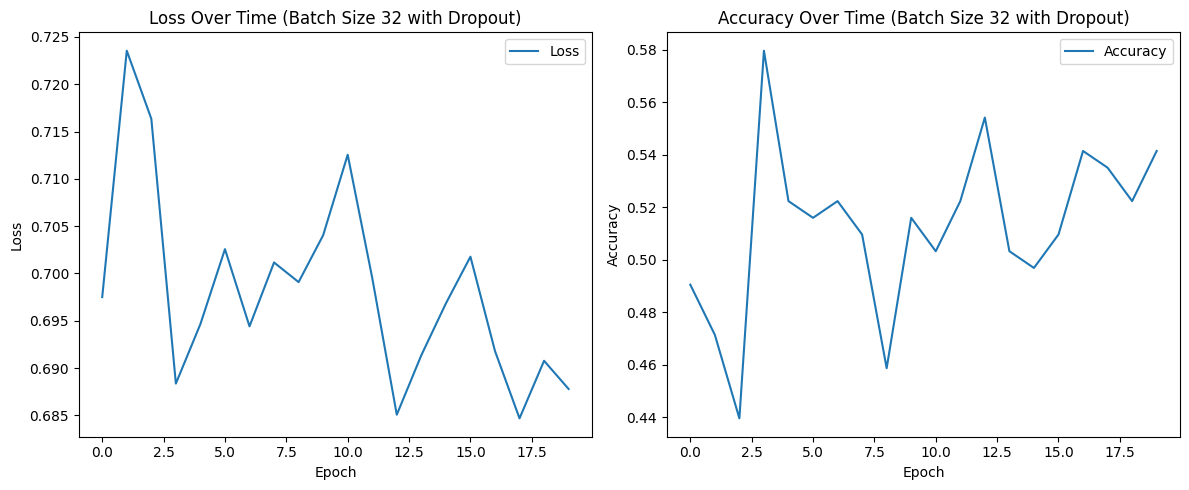

In [17]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_batch32_dropout.history['loss'], label='Loss')
plt.title('Loss Over Time (Batch Size 32 with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_batch32_dropout.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time (Batch Size 32 with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
 #32 batches no dropout
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history_batch32_nodropout = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=32, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5239 - loss: 0.8534 - val_accuracy: 0.4412 - val_loss: 0.9387
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5361 - loss: 0.7581 - val_accuracy: 0.4412 - val_loss: 0.9102
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5313 - loss: 0.7491 - val_accuracy: 0.4265 - val_loss: 0.8844
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5719 - loss: 0.7079 - val_accuracy: 0.4412 - val_loss: 0.8652
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6035 - loss: 0.6580 - val_accuracy: 0.4412 - val_loss: 0.8497
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5575 - loss: 0.7248 - val_accuracy: 0.4412 - val_loss: 0.8365
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5558 - loss: 0.6976 - val_accuracy: 0.4412 - val_loss: 0.8270
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5362 - loss: 0.6930 - val_accuracy: 0.4412 - val_loss: 0.8196
Epoch 9/20


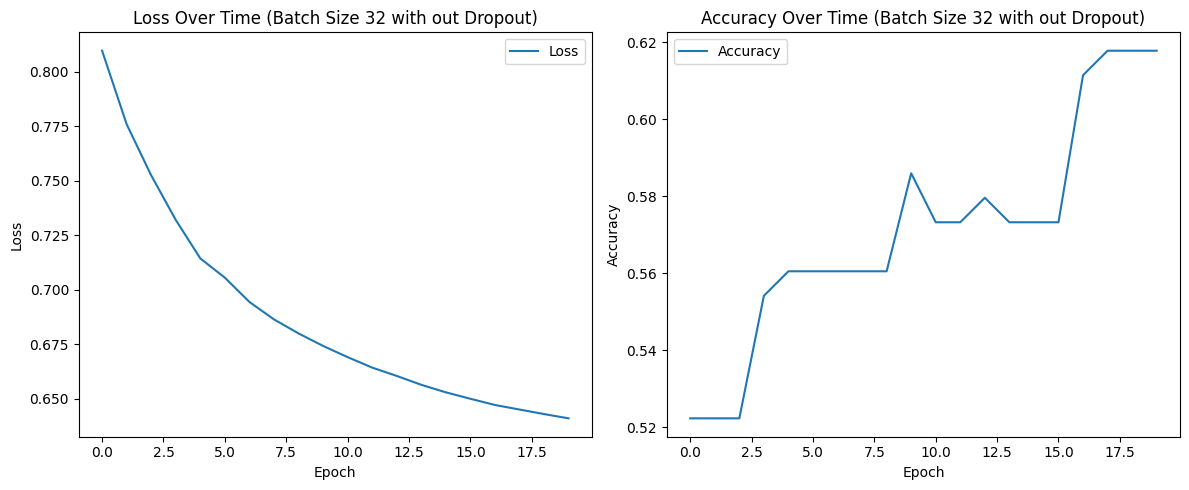

In [30]:
# Plot learning curves for non dropout
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_batch32_nodropout.history['loss'], label='Loss')
plt.title('Loss Over Time (Batch Size 32 with out Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_batch32_nodropout.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time (Batch Size 32 with out Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### ✍️ Your Response: 🔧
1.  For layers, adding 1 new layer gave me the best accuray. The optimal number for batch size is 32. I tested 8, 32,64, 128, and 256.
2. From the graph it seems like dropout doesn't help with overfitting in this data. The loss over time graph seems to be more stable and less volitile.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The model that preformed best on my dataset was the SVM model with the accuracy at .69. This was only much better than the other models. This was not the result I expected.
2. One model that was overfit was the Neural Network model with droput. The accuracy graph show an overfit error because there is high variance. The graph is super volitile and is not super consistent, showing that the model is overfit.
3. The naiive bays would probably be esiest to interpret to the marketing team and can provide insights that can directly impact creative descisions. If they're shooting for the highest accuracy and not concerned with the 'whys' they should use the SVM or neural networks.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [20]:
!jupyter nbconvert --to html "lab_12_LastnameFirstname.ipynb"

[NbConvertApp] WARNING | pattern 'lab_12_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]


# Task
Optimize the neural network model in cell '258xOQzl5GXk' by systematically removing layers to achieve the highest possible accuracy.

## Modify the neural network model

### Subtask:
Systematically remove layers from the neural network model in cell `258xOQzl5GXk`.


**Reasoning**:
Modify the Sequential model in cell '258xOQzl5GXk' by removing the last Dense layer before the output layer.



In [21]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(2, activation='relu'), # New Layer 2
    Dense(2, activation='relu'), # New Layer 3
    Dense(2, activation='relu'), # New Layer 4
    Dense(2, activation='relu'), # New Layer 5
    # Removed Dense(2, activation='relu'), # New Layer 6
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4145 - loss: 0.6934 - val_accuracy: 0.4412 - val_loss: 0.6933
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5465 - loss: 0.6930 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5308 - loss: 0.6930 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4941 - loss: 0.6932 - val_accuracy: 0.4412 - val_loss: 0.6936
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5417 - loss: 0.6928 - val_accuracy: 0.4412 - val_loss: 0.6937
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5303 - loss: 0.6929 - val_accuracy: 0.4412 - val_loss: 0.6938
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5437 - loss: 0.6927 - val_accuracy: 0.4412 - val_loss: 0.6939
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5403 - loss: 0.6926 - val_accuracy: 0.4412 - val_loss: 0.6940
Ep

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [22]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(2, activation='relu'), # New Layer 2
    Dense(2, activation='relu'), # New Layer 3
    Dense(2, activation='relu'), # New Layer 4
    # Removed Dense(2, activation='relu'), # New Layer 5
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4923 - loss: 0.6931 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4900 - loss: 0.6932 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5053 - loss: 0.6931 - val_accuracy: 0.4412 - val_loss: 0.6936
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4687 - loss: 0.6934 - val_accuracy: 0.4412 - val_loss: 0.6937
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5204 - loss: 0.6930 - val_accuracy: 0.4412 - val_loss: 0.6938
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5472 - loss: 0.6926 - val_accuracy: 0.4412 - val_loss: 0.6940
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5216 - loss: 0.6929 - val_accuracy: 0.4412 - val_loss: 0.6941
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4878 - loss: 0.6934 - val_accuracy: 0.4412 - val_loss: 0.6942
E

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [23]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(2, activation='relu'), # New Layer 2
    Dense(2, activation='relu'), # New Layer 3
    # Removed Dense(2, activation='relu'), # New Layer 4
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5325 - loss: 0.6931 - val_accuracy: 0.5588 - val_loss: 0.6929
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5100 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4864 - loss: 0.6930 - val_accuracy: 0.4412 - val_loss: 0.6934
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5347 - loss: 0.6928 - val_accuracy: 0.4412 - val_loss: 0.6935
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5748 - loss: 0.6923 - val_accuracy: 0.4412 - val_loss: 0.6938
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5326 - loss: 0.6923 - val_accuracy: 0.4412 - val_loss: 0.6939
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4833 - loss: 0.6927 - val_accuracy: 0.4412 - val_loss: 0.6940
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5264 - loss: 0.6920 - val_accuracy: 0.4412 - val_loss: 0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [24]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    Dense(2, activation='relu'), # New Layer 2
    # Removed Dense(2, activation='relu'), # New Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4490 - loss: 0.6972 - val_accuracy: 0.4853 - val_loss: 0.6946
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5648 - loss: 0.6914 - val_accuracy: 0.4706 - val_loss: 0.6952
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5847 - loss: 0.6910 - val_accuracy: 0.4853 - val_loss: 0.6955
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6008 - loss: 0.6905 - val_accuracy: 0.4853 - val_loss: 0.6959
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5616 - loss: 0.6939 - val_accuracy: 0.4706 - val_loss: 0.6962
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6249 - loss: 0.6897 - val_accuracy: 0.4706 - val_loss: 0.6965
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6141 - loss: 0.6891 - val_accuracy: 0.4706 - val_loss: 0.6968
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6673 - loss: 0.6855 - val_accuracy: 0.4559 - val_loss: 0.6971
E

**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [25]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(2, activation='relu'), # New Layer 1
    # Removed Dense(2, activation='relu'), # New Layer 2
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4410 - loss: 0.7207 - val_accuracy: 0.4265 - val_loss: 0.6918
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4763 - loss: 0.7167 - val_accuracy: 0.4265 - val_loss: 0.6899
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4795 - loss: 0.7084 - val_accuracy: 0.4559 - val_loss: 0.6897
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4430 - loss: 0.7065 - val_accuracy: 0.4706 - val_loss: 0.6902
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5576 - loss: 0.6885 - val_accuracy: 0.4706 - val_loss: 0.6913
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5153 - loss: 0.6869 - val_accuracy: 0.4412 - val_loss: 0.6921
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5247 - loss: 0.6940 - val_accuracy: 0.4706 - val_loss: 0.6924
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5886 - loss: 0.6863 - val_accuracy: 0.4706 - val_loss: 0.6928
Ep

**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [26]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    # Removed Dense(2, activation='relu'), # New Layer 1
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4740 - loss: 0.7040 - val_accuracy: 0.5588 - val_loss: 0.6910
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4524 - loss: 0.7004 - val_accuracy: 0.5294 - val_loss: 0.6915
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4788 - loss: 0.6972 - val_accuracy: 0.5294 - val_loss: 0.6919
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4725 - loss: 0.6979 - val_accuracy: 0.5441 - val_loss: 0.6923
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5221 - loss: 0.6950 - val_accuracy: 0.5294 - val_loss: 0.6925
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4765 - loss: 0.6948 - val_accuracy: 0.6029 - val_loss: 0.6931
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5243 - loss: 0.6944 - val_accuracy: 0.5882 - val_loss: 0.6933
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5967 - loss: 0.6937 - val_accuracy: 0.4706 - val_loss: 0.6

**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [27]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    # Removed Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4457 - loss: 0.9097 - val_accuracy: 0.5441 - val_loss: 0.7618
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4415 - loss: 0.8512 - val_accuracy: 0.5441 - val_loss: 0.7436
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4923 - loss: 0.7962 - val_accuracy: 0.5441 - val_loss: 0.7321
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4273 - loss: 0.7927 - val_accuracy: 0.5441 - val_loss: 0.7227
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4462 - loss: 0.7855 - val_accuracy: 0.5294 - val_loss: 0.7160
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5056 - loss: 0.7290 - val_accuracy: 0.5441 - val_loss: 0.7121
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4541 - loss: 0.7546 - val_accuracy: 0.5441 - val_loss: 0.7093
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4544 - loss: 0.7472 - val_accuracy: 0.5147 - val_loss: 0.7074
Ep

**Reasoning**:
Continue to systematically remove layers from the Sequential model in cell '258xOQzl5GXk' by removing the next to last Dense layer before the output layer.



In [28]:
# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    # Removed Dense(8, activation='relu'),  #Layer 2
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5479 - loss: 0.7910 - val_accuracy: 0.5588 - val_loss: 0.7074
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4736 - loss: 0.7937 - val_accuracy: 0.5441 - val_loss: 0.7078
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4941 - loss: 0.7685 - val_accuracy: 0.5441 - val_loss: 0.7085
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5854 - loss: 0.7109 - val_accuracy: 0.5294 - val_loss: 0.7093
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5442 - loss: 0.7366 - val_accuracy: 0.5294 - val_loss: 0.7098
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5455 - loss: 0.7292 - val_accuracy: 0.5294 - val_loss: 0.7100
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5655 - loss: 0.7025 - val_accuracy: 0.5294 - val_loss: 0.7118
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4938 - loss: 0.7306 - val_accuracy: 0.5294 - val_loss: 0.7126
Ep